In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('original.csv')
df.shape

(1499, 32)

In [3]:
df.head()

,Conversion Certificate,Deed from Previous Owner,Electricity Connection,Electricity Connection_detail,Encumberence Certificate,Is the plot free of any legal issues?,Revenue Document,Road Available,Road Available_detail,Sewage Connection,...,open-sides,overlooking,ownership,plot-area,price,price_available,price_per_sqft,transaction,type,width-road-facing
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.0,"Garden/Park, Main Road",Freehold,1440 sqft,23 Lac,1,1597.0,New Property,Residential Land / Plot,30 m
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,"Garden/Park, Main Road",Freehold,3600 sqft,60.5 Lac,1,1681.0,New Property,Residential Land / Plot,8 m
2,Yes,Yes,Yes,Electricity Board,Yes,Yes,NaN,Yes,Pucca Road,Yes,...,2.0,Main Road,Freehold,720 sqft,1.4 Lac,1,194.0,New Property,Residential Land / Plot,25 m
3,No,Yes,Yes,Electricity Board,No,Yes,Yes,Yes,Pucca Road,Yes,...,1.0,Main Road,Freehold,1615 sqft,90 Lac,1,5574.0,Resale,Residential Land / Plot,13 m
4,Yes,Yes,Yes,NaN,Yes,Yes,Yes,Yes,Pucca Road,Yes,...,4.0,"Garden/Park, Main Road",Freehold,1680 sqft,9.5 Lac,1,565.0,Resale,Residential Land / Plot,3 m


In [4]:
# df.columns

In [5]:
df.describe()

,fig_count,open-sides,price_available,price_per_sqft
count,1499.000000,984.000000,1499.000000,1121.000000
mean,2.726484,6.501016,0.747832,1789.763604
std,5.078151,105.960817,0.434402,3541.535712
min,0.000000,1.000000,0.000000,77.000000
25%,0.000000,1.000000,0.000000,556.000000
50%,1.000000,2.000000,1.000000,1296.000000
75%,4.000000,2.000000,1.000000,2066.000000
max,58.000000,3000.000000,1.000000,103333.000000


In [6]:
df.describe(include=['object'])

,Conversion Certificate,Deed from Previous Owner,Electricity Connection,Electricity Connection_detail,Encumberence Certificate,Is the plot free of any legal issues?,Revenue Document,Road Available,Road Available_detail,Sewage Connection,...,dimensions,floor,location,overlooking,ownership,plot-area,price,transaction,type,width-road-facing
count,340,340,340,224,340,340,112,340,306,340,...,543,1062,1499,574,890,1497,1121,1499,1499,893
unique,2,2,2,2,2,2,2,2,3,2,...,282,17,333,7,4,399,286,2,1,59
top,Yes,Yes,Yes,Electricity Board,Yes,Yes,Yes,Yes,Pucca Road,Yes,...,45 X 32,3,"Joka, Kolkata","Garden/Park, Main Road",Freehold,1440 sqft,30 Lac,Resale,Residential Land / Plot,10 m
freq,278,309,267,218,272,295,110,330,236,279,...,37,285,195,259,855,247,35,1143,1499,93


# Price Per Sq_ft

In [7]:
df.shape

(1499, 32)

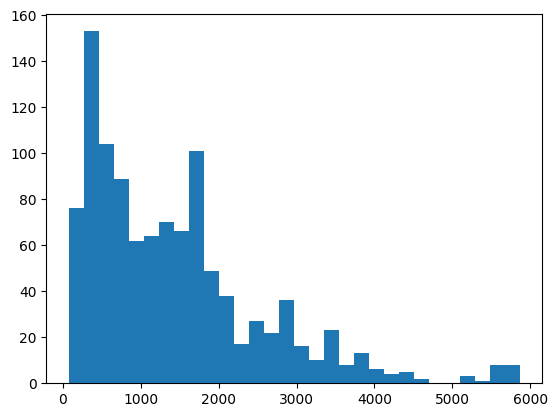

In [8]:
df = df[(df['price_per_sqft'] < 6000) | (df['price_per_sqft'].isna())]
plt.hist(df['price_per_sqft'], bins=30)
plt.show()

In [9]:
df.shape

(1459, 32)

# Location

In [10]:
df = df[df['location'] != 'Kolkata']
df['location'] = df['location'].str.split(', Kolkata', expand=True)[0]
df.shape

(1364, 32)

In [11]:
df['location'].value_counts()

location
Joka                195
Action Area 3       107
Rajarhat             58
Sonarpur             51
New Town             48
                   ... 
Camac Street          1
Canning 2             1
Metiabruz             1
Park Street Area      1
Bagmari               1
Name: count, Length: 332, dtype: int64

# OverLooking

In [12]:
df.shape

(1364, 32)

In [13]:
df['overlooking'].unique()

array(['Garden/Park, Main Road', 'Main Road', nan, 'Garden/Park',
       'Main Road, Garden/Park', 'Garden/Park, Pool, Main Road',
       'Pool, Garden/Park, Main Road', 'Pool, Main Road'], dtype=object)

In [14]:
dummy_columns = df['overlooking'].str.get_dummies(sep = ', ')
df = pd.concat([df, dummy_columns], axis=1)
df = df.drop(['overlooking'], axis=1)
df.head()

,Conversion Certificate,Deed from Previous Owner,Electricity Connection,Electricity Connection_detail,Encumberence Certificate,Is the plot free of any legal issues?,Revenue Document,Road Available,Road Available_detail,Sewage Connection,...,plot-area,price,price_available,price_per_sqft,transaction,type,width-road-facing,Garden/Park,Main Road,Pool
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1440 sqft,23 Lac,1,1597.0,New Property,Residential Land / Plot,30 m,1,1,0
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3600 sqft,60.5 Lac,1,1681.0,New Property,Residential Land / Plot,8 m,1,1,0
2,Yes,Yes,Yes,Electricity Board,Yes,Yes,NaN,Yes,Pucca Road,Yes,...,720 sqft,1.4 Lac,1,194.0,New Property,Residential Land / Plot,25 m,0,1,0
3,No,Yes,Yes,Electricity Board,No,Yes,Yes,Yes,Pucca Road,Yes,...,1615 sqft,90 Lac,1,5574.0,Resale,Residential Land / Plot,13 m,0,1,0
4,Yes,Yes,Yes,NaN,Yes,Yes,Yes,Yes,Pucca Road,Yes,...,1680 sqft,9.5 Lac,1,565.0,Resale,Residential Land / Plot,3 m,1,1,0


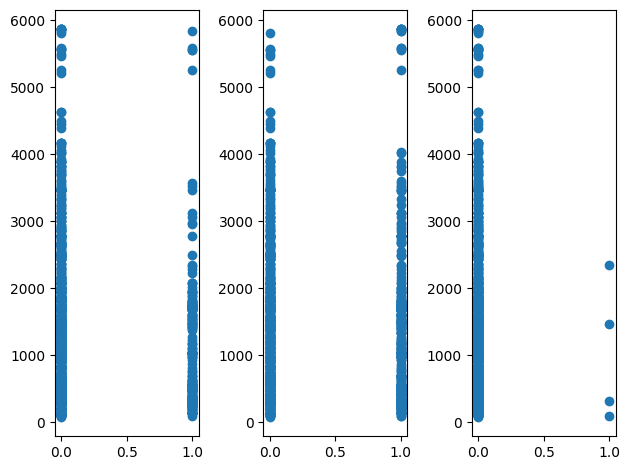

In [15]:
fig, (ax1, ax2, ax3) = plt.subplots(1,3)
ax1.scatter(df['Garden/Park'], df['price_per_sqft'])
ax2.scatter(df['Main Road'], df['price_per_sqft'])
ax3.scatter(df['Pool'], df['price_per_sqft'])

fig.tight_layout()
plt.show()

# Width-Road Facing

In [16]:
df['width-road'] = df['width-road-facing'].str.split(' m', expand=True)[0].astype(float)
# df = df[df['width-road'] <= 33]
df = df.drop(['width-road-facing'], axis=1)
df.head()

,Conversion Certificate,Deed from Previous Owner,Electricity Connection,Electricity Connection_detail,Encumberence Certificate,Is the plot free of any legal issues?,Revenue Document,Road Available,Road Available_detail,Sewage Connection,...,plot-area,price,price_available,price_per_sqft,transaction,type,Garden/Park,Main Road,Pool,width-road
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1440 sqft,23 Lac,1,1597.0,New Property,Residential Land / Plot,1,1,0,30.0
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3600 sqft,60.5 Lac,1,1681.0,New Property,Residential Land / Plot,1,1,0,8.0
2,Yes,Yes,Yes,Electricity Board,Yes,Yes,NaN,Yes,Pucca Road,Yes,...,720 sqft,1.4 Lac,1,194.0,New Property,Residential Land / Plot,0,1,0,25.0
3,No,Yes,Yes,Electricity Board,No,Yes,Yes,Yes,Pucca Road,Yes,...,1615 sqft,90 Lac,1,5574.0,Resale,Residential Land / Plot,0,1,0,13.0
4,Yes,Yes,Yes,NaN,Yes,Yes,Yes,Yes,Pucca Road,Yes,...,1680 sqft,9.5 Lac,1,565.0,Resale,Residential Land / Plot,1,1,0,3.0


In [17]:
df.shape

(1364, 34)

In [18]:
median_width = (df['width-road'].median())

def width(row) :
    if pd.isna(row['width-road']) :
        if pd.isna(row['open-sides']) : return row['width-road']
        else : return median_width
    else : return row['width-road']

df['width-road'] = df.apply(width, axis=1)

In [19]:
median_open_sides = df['open-sides'].median()

def open_sides(row) :
    if pd.isna(row['open-sides']) :
        if pd.isna(row['width-road']) : return row['open-sides']
        else : return median_open_sides
    else : return row['open-sides']

df['open-sides'] = df.apply(open_sides, axis=1)

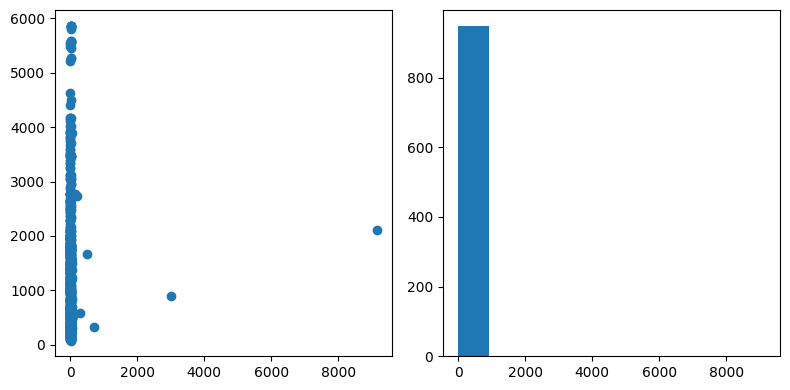

In [20]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize = (8,4))
ax1.scatter(df['width-road'], df['price_per_sqft'])
ax2.hist(df['width-road'], bins=10)
fig.tight_layout()
plt.show()

In [21]:
df.shape

(1364, 34)

# Price

In [22]:
def price_to_lakhs(x) :
    if pd.isna(x) : return x
    (numeric, short) = x.split(' ')
    if short == 'Lac' : return float(numeric)
    if short == 'Cr' : return float(numeric) * 100

df['price'] = df['price'].apply(price_to_lakhs)
df['price'].head()

0    23.0
1    60.5
2     1.4
3    90.0
4     9.5
Name: price, dtype: float64

In [23]:
df.shape

(1364, 34)

# Area (sqft)

In [24]:
df['area'] = df['plot-area'].str.split(' ', expand=True)[0].astype(float)
df = df.drop(['plot-area'], axis=1)
df['area'].head()

0    1440.0
1    3600.0
2     720.0
3    1615.0
4    1680.0
Name: area, dtype: float64

# Construction

In [25]:
def set_construction(x) :
    if x == 'Yes' : return x
    return 'No'

df['construction'] = df['construction'].apply(set_construction)
df['construction'].unique()

array(['Yes', 'No'], dtype=object)

# Boundary

In [26]:
df['boundary'] = df['boundary'].fillna('No')
df['boundary'].value_counts()

boundary
Yes    710
No     654
Name: count, dtype: int64

# Ownership

In [27]:
df['ownership'].value_counts()

ownership
Freehold                791
Power Of Attorney        13
Co-operative Society     11
Leasehold                 9
Name: count, dtype: int64

Makes no sense to keep it a skewed column and which has so many empty rows. So drop it

In [28]:
df = df.drop(['ownership'], axis=1)

# CSV Transform

In [29]:
df.columns = df.columns.str.lower().str.replace(' ', '_').str.replace('-', '_').str.replace('/','_').str.replace('?','').str.replace(r'(?<=\w)([A-Z])', r'_\1').str.lower()

In [30]:
df.to_csv('data.csv', index=False)
print('Converted to csv')

Converted to csv


In [35]:
print(df['price_available'].unique())

train = df[df['price_available'] == 1]
test = df[df['price_available'] == 0] 

train = train.drop(['price_available'], axis=1)
test = test.drop(['price', 'price_available', 'price_per_sqft'], axis=1)

train.shape, test.shape

[1 0]


((1022, 32), (342, 30))

In [37]:
train.to_csv('train.csv', index=False)
test.to_csv('test.csv', index=False)

print('Created training and testing data')

Created training and testing data
